# Writing data to and reading data from a Database using Python

## Libraries and settings

In [12]:
# Libraries
import os
import sqlite3
import fnmatch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Function to close a sqlite db-connection
def check_conn(conn):
     try:
        conn.cursor()
        return True
     except Exception as ex:
        return False

# Get current working directory
print(os.getcwd())

c:\Users\vionh\workspace\Data Analysis\data_analytics\Week_02


## Create sqlite data base

In [13]:
# Create data base
conn = sqlite3.connect('apartment_database.db') 
cursor = conn.cursor()

# Show dbs in the directory
flist = fnmatch.filter(os.listdir('.'), '*.db')
for i in flist:
    print(i)

apartment_database.db


## Create SQL-table in the database

In [14]:
cursor.execute('''CREATE TABLE IF NOT EXISTS apartments_table (OrderId VARCHAR(50),
                                                               Adress VARCHAR(200),
                                                               Rooms DECIMAL(8,2),
                                                               Area INT(8),
                                                               Price DECIMAL(8,2))''')
# Confirm changes to the table
conn.commit()

## Read data from file to data frame

In [33]:
df = pd.read_csv('apartments_data_prepared.csv', 
                  sep=',', 
                  encoding='utf-8')[['web-scraper-order', 'address_raw', 'rooms', 'area', 'price']]
print(df.shape)
df.head(5)

(1008, 10)


,web-scraper-order,web-scraper-start-url,rooms_area_price_raw,address_raw,price_raw,description_raw,text_raw,rooms,area,price
0,1693998201-1,https://www.immoscout24.ch/de/immobilien/miete...,"3 Zimmer, 49 m², CHF 1441.—","Neuhusstrasse 6, 8630 Rüti ZH, ZH",CHF 1441.—,«Gemütliche Wohnung im Grünen»,"3 Zimmer, 49 m², CHF 1441.—Neuhusstrasse 6, 86...",3.0,49.0,1441.0
1,1693998201-2,https://www.immoscout24.ch/de/immobilien/miete...,"3,5 Zimmer, 65 m², CHF 1850.—","Zürcherstrasse 1, 8173 Neerach, ZH",CHF 1850.—,«Attraktive 3.5-Zimmer-EG-Wohnung in Neerach»,"3,5 Zimmer, 65 m², CHF 1850.—Zürcherstrasse 1,...",3.5,65.0,1850.0
2,1693998201-3,https://www.immoscout24.ch/de/immobilien/miete...,"19 m², CHF 2686.—","Cramerstrasse 8-12, 8004 Zürich, ZH",CHF 2686.—,«Studio Apartment Junior Balcony»,"19 m², CHF 2686.—Cramerstrasse 8-12, 8004 Züri...",NaN,NaN,2686.0
3,1693998201-4,https://www.immoscout24.ch/de/immobilien/miete...,"2 Zimmer, 54 m², CHF 4853.—","Cramerstrasse 8-12, 8004 Zürich, ZH",CHF 4853.—,«2 Bedroom Apartment Senior Balcony»,"2 Zimmer, 54 m², CHF 4853.—Cramerstrasse 8-12,...",2.0,54.0,4853.0
4,1693998201-5,https://www.immoscout24.ch/de/immobilien/miete...,"2 Zimmer, 49 m², CHF 4335.—","Rotachstrasse 33, 8003 Zürich, ZH",CHF 4335.—,«2 Bedroom Apartment Junior Terrace»,"2 Zimmer, 49 m², CHF 4335.—Rotachstrasse 33, 8...",2.0,49.0,4335.0


## Write data to the SQL-table in data base

In [16]:
df.to_sql(name = 'apartments_table',
          con = conn,
          index = False,
          if_exists = 'replace')

1008

## Query the SQL-table

In [17]:
# Query the SQL-table
cursor.execute('''SELECT *
               FROM apartments_table
               WHERE rooms >=1''')

df = pd.DataFrame(cursor.fetchall(), 
                  columns=['OrderId','Address','Rooms','Area','Price'])    
df

,OrderId,Address,Rooms,Area,Price
0,1693998201-1,"Neuhusstrasse 6, 8630 Rüti ZH, ZH",3.0,49.0,1441.0
1,1693998201-2,"Zürcherstrasse 1, 8173 Neerach, ZH",3.5,65.0,1850.0
2,1693998201-4,"Cramerstrasse 8-12, 8004 Zürich, ZH",2.0,54.0,4853.0
3,1693998201-5,"Rotachstrasse 33, 8003 Zürich, ZH",2.0,49.0,4335.0
4,1693998201-16,"Wolframplatz 1, 8045 Zürich, ZH",2.0,32.0,3515.0
...,...,...,...,...,...
958,1693998381-1004,"Hölderlinstrasse 12, 8032 Zürich, ZH",3.5,82.0,2830.0
959,1693998381-1005,"Hegifeldstrasse 70, 8404 Reutlingen (Winterthu...",4.0,73.0,1713.0
960,1693998381-1006,"Holzmoosrütisteig 2b, 8820 Wädenswil, ZH",4.5,110.0,3500.0
961,1693998381-1007,"Vogelbuckstrasse 25, 8307 Effretikon, ZH",3.0,68.0,1650.0


## Plot histogramm of rental prices

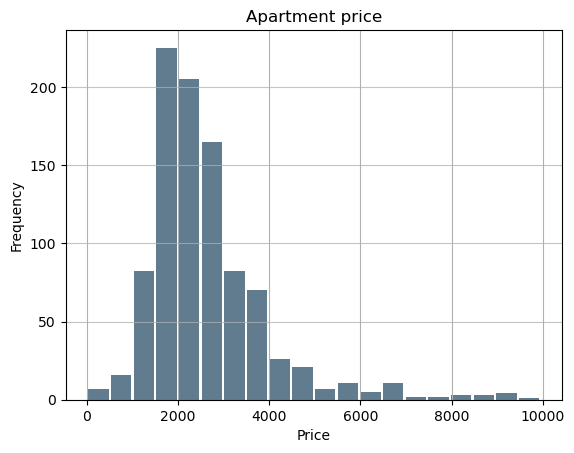

In [18]:
df.Price.plot.hist(grid=True, 
                   bins=20, 
                   rwidth=0.9,
                   color='#607c8e')
plt.title('Apartment price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

Additional SQL-Queries

In [32]:
# c) Write an SQL-query to filter all apartments with >= 4.0 rooms and where the area
# is >= 100m2. An example SQL query can be found in the Jupyter notebook.
cursor.execute('''SELECT *
               FROM apartments_table
               WHERE rooms >=4 AND area>=100''')
df = pd.DataFrame(cursor.fetchall(),
                  columns=['OrderId', 'Address', 'Rooms', 'Area', 'Price'])
print(df.head(5))

cursor.execute('''SELECT rooms, AVG(price)
 FROM apartments_table
 GROUP BY rooms''')
df_avgPricePerRoom = pd.DataFrame(cursor.fetchall(),
                  columns=['Rooms', 'AvgPrice'])
print(df_avgPricePerRoom.head(5))

cursor.execute('''SELECT rooms, AVG(area)
 FROM apartments_table
 GROUP BY rooms''')
df_avgAreaPerRoom = pd.DataFrame(cursor.fetchall(),
                  columns=['Rooms', 'AvgArea'])
print(df_avgAreaPerRoom.head(5))


         OrderId                                         Address  Rooms  \
0  1693998205-26           Frowiesstrasse 36, 8344 Bäretswil, ZH    5.5   
1  1693998205-27          Kanzleistrasse 15, 8418 Schlatt ZH, ZH    4.5   
2  1693998205-29                   Bolletweg 14, 8934 Knonau, ZH    5.5   
3  1693998205-31               Adlergass 6, 8805 Richterswil, ZH    5.5   
4  1693998205-33  Haldenstrasse 67, 8602 Wangen b. Dübendorf, ZH    4.5   

    Area   Price  
0  140.0  2750.0  
1  104.0  2700.0  
2  150.0  3390.0  
3  165.0     NaN  
4  118.0  3390.0  
   Rooms     AvgPrice
0    NaN  3250.844444
1    1.0  1290.311475
2    1.5  2036.418605
3    2.0  2133.375000
4    2.5  2450.907407
   Rooms    AvgArea
0    NaN        NaN
1    1.0  32.092593
2    1.5  35.526316
3    2.0  54.428571
4    2.5  67.317881


## Close db connection (if open)

In [8]:
# Close db connection (if open)
try:
    if check_conn(conn):
        conn.close()
    else:
        pass
except:
    pass

# Status (True = open, False = closed)
print(check_conn(conn))

False


### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [9]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
NT
Windows | 10
Datetime: 2023-10-17 17:51:12
Python Version: 3.9.13
-----------------------------------
